In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finglish import f2p

Loading converters...
Loading persian word list...
Loading dictionary...


## load subtacts.csv and subscription3.csv 

#### load subtact and assin header 

In [2]:
subtacts = pd.read_csv("subtacts.csv", names=["user_id",'group_id',"post"])

In [3]:
subtacts.to_csv("msubtacts.csv", index=False)

In [4]:
msubtacts = pd.read_csv("msubtacts.csv")

In [5]:
msubtacts

,user_id,group_id,post
0,806465768,1214462642,ADMIN
1,806465768,1427140891,ADMIN
2,96821350,1086836533,FORMER_MEMBER
3,96821350,1149082499,FORMER_MEMBER
4,96821350,1363005718,CURRENT_MEMBER
...,...,...,...
685611,451603133,1135139610,CURRENT_MEMBER
685612,451603133,1376902893,FORMER_MEMBER
685613,433321059,1139143344,FORMER_MEMBER
685614,433321059,1146690784,FORMER_MEMBER


#### load subscription3 and assin header 

In [9]:
subscriptions3 = pd.read_csv("subscriptions3.csv", encoding='utf-8', delimiter="#DELIMITER#", header=None)
subscriptions3.columns=['group_id', "peer_name","about"]
subscriptions3['group_id'] = subscriptions3['group_id'].astype(str).str.replace('-', '')

/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
subscriptions3

,group_id,peer_name,about
0,2078972966,آموزش مهارت های ارتباطی,سلام .من علیرضا کرمی هستم مربی و مدرس دوره‌ها...
1,2041783709,مستر کنکور 97(استادمددی),? آقای خاص مشاوره و برنامه ریزی کنکور ? ?مبتکر...
2,1876162099,ناصر خان حجازی,تنها کانال فعال تلگرامي یادبودناصرخان حجازی✌✋ ...
3,1854882373,Pishgoo,? فال☕دعا\#طلسم\# کارت\#جزوه\#دعا طلسم\#مهره م...
4,1523892810,بازارچه ملکان,?سیمساری آنلاین ملکان? ...
...,...,...,...
29430,1799454871,????تورک های جذاب لعنتی????,??گپ تورک های جذاب لعنتی??? ??تورک های ارومیه...
29431,1799507214,、ARIEL,˓ ??????? ?? ????? ??????? ˒ 20...
29432,1799541728,金龙社区（免费查合约）,进群福利免费查bsc合约！
29433,1799590600,???? ?????,"""Hi ass-kisser @durov,i swear that this channe..."


In [11]:
msubtacts.dtypes

user_id      int64
group_id     int64
post        object
dtype: object

In [12]:
convert_dict = {'group_id': int,
                }

In [13]:
subscriptions3 = subscriptions3.astype(convert_dict)

In [14]:
merged_df = subscriptions3.merge(msubtacts, on="group_id", how='inner')

In [15]:
merged_df

,group_id,peer_name,about,user_id,post
0,1000006831,روزنامه وقایع استان,"?روزنامه صبح""وقایع استان""مرجع رسمی اخبار استان...",173318782,CHANNEL_EXTRACTRD_ADMIN
1,1000027505,Cheet Bazi,All the content of the channel is sent solely ...,541239771,CURRENT_MEMBER
2,1000039922,میلیتــــــــــاریسمـ,لینک گروه https://t.me/joinchat/KSVK9-_7yyI2OW...,362541001,CHANNEL_MEMBER
3,1000157416,EdonTools ( ابزارآلات ادون تولز),مرکز پخش ابزارآلات ادونEDON صنعتی،کشاورزی و ...,119944726,CHANNEL_EXTRACTRD_ADMIN
4,1000170429,KHAMENEI.IR,پايگاه اطلاع رسانی دفترحفظ و نشر آثار حضرت آیت...,152638140,CHANNEL_MEMBER
...,...,...,...,...,...
685605,1799725737,??ٌٍٍٍٍٍٍٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜۘۘۘۘ͜͡⚘͜͡...,خوش آمدید به \#ابر \#گپ \#طهران \#کرج ...,1194817985,CURRENT_MEMBER
685606,1799725737,??ٌٍٍٍٍٍٍٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜۘۘۘۘ͜͡⚘͜͡...,خوش آمدید به \#ابر \#گپ \#طهران \#کرج ...,1444812492,CURRENT_MEMBER
685607,1799725737,??ٌٍٍٍٍٍٍٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜۘۘۘۘ͜͡⚘͜͡...,خوش آمدید به \#ابر \#گپ \#طهران \#کرج ...,1771289551,CURRENT_MEMBER
685608,1799725737,??ٌٍٍٍٍٍٍٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜٜۘۘۘۘ͜͡⚘͜͡...,خوش آمدید به \#ابر \#گپ \#طهران \#کرج ...,1503314367,CURRENT_MEMBER


In [16]:
merged_df['peer_name'] = merged_df['peer_name'].str.replace('?', '')
merged_df['about'] = merged_df['about'].str.replace('?', '')
merged_df['peer_name'] = merged_df['peer_name'].str.replace('#', '')
merged_df['about'] = merged_df['about'].str.replace('#', '')
merged_df['peer_name'] = merged_df['peer_name'].str.replace("\\","")
merged_df['about'] = merged_df['about'].str.replace('\\', '')

In [17]:
merged_df.to_csv("merged_df.csv", index=False)

In [18]:
sub_merged = subscriptions3.iloc[:100]

In [19]:
sub_merged

,group_id,peer_name,about
0,2078972966,آموزش مهارت های ارتباطی,سلام .من علیرضا کرمی هستم مربی و مدرس دوره‌ها...
1,2041783709,مستر کنکور 97(استادمددی),? آقای خاص مشاوره و برنامه ریزی کنکور ? ?مبتکر...
2,1876162099,ناصر خان حجازی,تنها کانال فعال تلگرامي یادبودناصرخان حجازی✌✋ ...
3,1854882373,Pishgoo,? فال☕دعا\#طلسم\# کارت\#جزوه\#دعا طلسم\#مهره م...
4,1523892810,بازارچه ملکان,?سیمساری آنلاین ملکان? ...
...,...,...,...
95,1002265355,گروه عمران و معماری,کانال های ما @Fazee2 @HiAzmoon @Moghararat22 ...
96,1002272868,یزدرسا,شهروند خبرنگار و ارسال محتوا: @Erteb...
97,1002292300,Tripp,Get High Admin tabadol: @dark_than_black
98,1002307702,توییت فان,مجله توییت فان ?فعالیت کانال توییت فان به دور ...


In [20]:
def convert_pinglish_to_persian(text):
    if isinstance(text, str) and any(char.isalpha() for char in text):
        return f2p(text)
    return text


In [21]:
# Assuming your DataFrame is named "df"
sub_merged['persion'] = sub_merged['peer_name'].apply(convert_pinglish_to_persian)


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
sub = subscriptions3.iloc[100:200]

In [23]:
sub['persion'] = sub['peer_name'].apply(convert_pinglish_to_persian)


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
contains_english = subscriptions3["peer_name"].str.contains('[A-Za-z]', na=False)


In [25]:
count_english_rows = contains_english.sum()


In [26]:
count_english_rows

6278

In [35]:
sub

,group_id,peer_name,about,persion
100,1002410325,?? اشپزی ودسر ??,گروه آشپزی و دسر ?? لینک گروه:?? https://t.me/...,اشپزی ودسر
101,1002422459,گلهای بهشت,@golhayebehesht5 ??سفارش تک مدیر?? @golhaye_...,گلهای بهشت
102,1002436825,توفان یزد,راهی برای ارتباط @Mshogh,توفان یزد
103,1002444037,??شاتوتستان ??,NaN,شاتوتستان
104,1002468486,دکتر پریسا نصری | parisa nasri,سایت ? https://www.parisanasri.com دانلود اپل...,دکتر پریسا نصری پریسا ناصری
...,...,...,...,...
195,1005155162,تربیت فرزند نورِدیده,پرسش وپاسخ نداریم تبلیغات @tablighat_128 سف...,تربیت فرزند نورِدیده
196,1005190203,?حقایق عجیب و‌ شگفت انگیز,مجله علمی وسرگرمی? حقایق عجیب،دانستنیها? اتفاق...,حقایق عجیب و‌ شگفت انگیز
197,1005228088,? آرامش زندگی ?,مدیریت : @MM9259,آرامش زندگی
198,1005268692,خوراک خام‌گیاهی VEG,گروه خوراک خامگیاهی VEG ویژه قرار دادن غذاهای ...,خوراک خام‌گیاهی وگ


In [37]:
from preprocess import clean_up_pipeline
bow_names = []
bow_abouts = []
bow = []

for i, row in sub.iterrows():
    name = clean_up_pipeline(row["persion"])
    about = row["about"]
    
    # Check if 'about' is a string or non-empty before cleaning
    if isinstance(about, str) and about.strip():  # Check for non-empty string
        about = clean_up_pipeline(about)
    else:
        about = ""  # Handle empty or non-string values
    
    bow_names.append(name)
    bow_abouts.append(about)
    bow.append(name + ' ' + about)

sub['bow_name'] = bow_names
sub['bow_about'] = bow_abouts
sub['bow'] = bow


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [38]:
sub.dtypes

group_id      int64
peer_name    object
about        object
persion      object
bow_name     object
bow_about    object
bow          object
dtype: object

In [39]:
sub["bow"].tolist()

['اشپزی ودسر گروه شپزی دسر لینک گروه',
 'گل بهشت سفارش تک مدیر اطلاعات انتخاب الا استعلام موجود ادمین وارز وجههزنه پست ارسال رسید#رس وارزدرس امل پست دراخر ارسال',
 'توفان یزد راه ارتباط',
 'شاتوتستان ',
 'دکتر پریسا نصر پریسا ناصر سایت دانلود اپلکیشین مشاور فروش اینستاگرام',
 'اندرومدا کانال رسم گروه اندرومدا اطلاع خرین اخبار کانال مارا دنبال برنامه گروه اندرومدا',
 'فروشگاه اینترنت زنبیل فروشگاه متنوع قیمت بیشترین خدمات فروش تماس',
 'رخنده بازار رخنده بازارر عکس فیلم ممنوع چت ممنوع تعطیل بامداد صبح',
 'دانلود هنگ موزیک دانلود هنگ موزیک کانال اختصاص وبسایت موزیک تلگرام درس سایت هنگ تبلیغات لطفا جهت هنگ درخواست پیام داد#ده',
 'شمیم کردستان گروه فرهنگ مذهب شمیم کردستان',
 'انجمن علم مهندس نقشه ایران انجمنعلمیمهندسینقشهبرداریایران بزرگ گردهمایی مهندس نقشه بردار ایران مباحث علم موزشی کاریابی کارفرما',
 'روزگار کودک کانال نکات صحیح تربیت واهای مادرانه قصه بچه موزیک\u200cهای کودکانه دید#بین شنید#شنو کانال متعلق گروه موزشی روزگار کودک',
 'ستوراتاغانصوررمزاتاشعار قنا الول تلرم لنشر اف غااانی س

In [40]:
from collections import Counter
# Sample bag of words
for bag_of_words in sub["bow"].tolist():
    
    # Split the bag of words into individual words
    words = bag_of_words.split(' ')
    # Count word frequencies
    word_counts = Counter(words)

    # Find the word with the highest frequency
    main_word = word_counts.most_common(2)
    print(f"Main word: {main_word}")

Main word: [('گروه', 2), ('اشپزی', 1)]
Main word: [('پست', 2), ('ارسال', 2)]
Main word: [('توفان', 1), ('یزد', 1)]
Main word: [('شاتوتستان', 1), ('', 1)]
Main word: [('پریسا', 2), ('دکتر', 1)]
Main word: [('اندرومدا', 3), ('کانال', 2)]
Main word: [('فروشگاه', 2), ('اینترنت', 1)]
Main word: [('رخنده', 2), ('ممنوع', 2)]
Main word: [('هنگ', 4), ('موزیک', 3)]
Main word: [('شمیم', 2), ('کردستان', 2)]
Main word: [('علم', 2), ('مهندس', 2)]
Main word: [('روزگار', 2), ('کودک', 2)]
Main word: [('ستوراتاغانصوررمزاتاشعار', 1), ('قنا', 1)]
Main word: [('اموزشگاه', 2), ('موز', 2)]
Main word: [('عزیز', 2), ('نمود#نما', 2)]
Main word: [('لینک', 3), ('خیمه', 2)]
Main word: [('م', 1), ('متن', 1)]
Main word: [('تیوال', 5), ('هنر', 2)]
Main word: [('علی', 1), ('حک', 1)]
Main word: [('الان', 1), ('یهویی', 1)]
Main word: [('شرق', 3), ('مزون', 3)]
Main word: [('رامش', 2), ('هستی', 2)]
Main word: [('تبلیغ', 3), ('اخبار', 2)]
Main word: [('فطرس', 2), ('حساب', 1)]
Main word: [('رپ', 1), ('اورجینال', 1)]
Main wo

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
bag_of_words = sub["bow"].tolist()
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the bag of words data
tfidf_matrix = tfidf_vectorizer.fit_transform(bag_of_words)

# Access the TF-IDF matrix as a NumPy array
tfidf_matrix_array = tfidf_matrix.toarray()

# Print the TF-IDF matrix
print(tfidf_matrix_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
from sklearn.cluster import KMeans
# Define the number of clusters (K)
num_clusters = 3  # You can choose the number of clusters based on your specific use case.

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the K-Means model to your TF-IDF matrix
kmeans.fit(tfidf_matrix)
# Get the cluster assignments for each document
cluster_assignments = kmeans.labels_
sub['cluster'] = cluster_assignments


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [46]:
sub['cluster'] = cluster_assignments


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the bag of words data
tfidf_matrix = tfidf_vectorizer.fit_transform(bag_of_words)

# Create a K-Means model
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the K-Means model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Get the cluster assignments for each document
cluster_assignments = kmeans.labels_

# Add the cluster assignments to your DataFrame (if needed)
sub['cluster'] = cluster_assignments




/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [53]:
sub.head(20)

,group_id,peer_name,about,persion,bow_name,bow_about,bow,cluster
100,1002410325,?? اشپزی ودسر ??,گروه آشپزی و دسر ?? لینک گروه:?? https://t.me/...,اشپزی ودسر,اشپزی ودسر,گروه شپزی دسر لینک گروه,اشپزی ودسر گروه شپزی دسر لینک گروه,2
101,1002422459,گلهای بهشت,@golhayebehesht5 ??سفارش تک مدیر?? @golhaye_...,گلهای بهشت,گل بهشت,سفارش تک مدیر اطلاعات انتخاب الا استعلام موجود...,گل بهشت سفارش تک مدیر اطلاعات انتخاب الا استعل...,3
102,1002436825,توفان یزد,راهی برای ارتباط @Mshogh,توفان یزد,توفان یزد,راه ارتباط,توفان یزد راه ارتباط,3
103,1002444037,??شاتوتستان ??,NaN,شاتوتستان,شاتوتستان,,شاتوتستان,0
104,1002468486,دکتر پریسا نصری | parisa nasri,سایت ? https://www.parisanasri.com دانلود اپل...,دکتر پریسا نصری پریسا ناصری,دکتر پریسا نصر پریسا ناصر,سایت دانلود اپلکیشین مشاور فروش اینستاگرام,دکتر پریسا نصر پریسا ناصر سایت دانلود اپلکیشین...,0
105,1002516570,اندرومدا,کانال رسمی گروه اندرومدا برای اطلاع از آخرین ا...,اندرومدا,اندرومدا,کانال رسم گروه اندرومدا اطلاع خرین اخبار کانال...,اندرومدا کانال رسم گروه اندرومدا اطلاع خرین اخ...,2
106,1002525360,فروشگاه اینترنتی زنبیل,فروشگاهی بزرگ و متنوع با بهترین قیمت و بیشترین...,فروشگاه اینترنتی زنبیل,فروشگاه اینترنت زنبیل,فروشگاه متنوع قیمت بیشترین خدمات فروش تماس,فروشگاه اینترنت زنبیل فروشگاه متنوع قیمت بیشتر...,0
107,1002538340,رٍٍٍۘۘۘۘۘ͜͡✾ٍُُخ়়ٍٍٍۘۘۘ͜͡ৃ়ৃৃৃ়ٍٍُُٰٖۘنٍٍۘۘۘد...,رٍٍٍۘۘۘۘۘ͜͡✾ٍُُخ়়ٍٍٍۘۘۘ͜͡ৃ়ৃৃৃ়ٍٍُُٰٖۘنٍٍۘۘۘد...,رٍٍٍۘۘۘۘۘ͜͡✾ٍُُخ়়ٍٍٍۘۘۘ͜͡ৃ়ৃৃৃ়ٍٍُُٰٖۘنٍٍۘۘۘد...,رخنده بازار,رخنده بازارر عکس فیلم ممنوع چت ممنوع تعطیل بام...,رخنده بازار رخنده بازارر عکس فیلم ممنوع چت ممن...,1
108,1002577017,دانلود آهنگ و موزیک Behmusic,دانلود آهنگ جدید | به موزیک کانال اختصاصی وبس...,دانلود آهنگ و موزیک Behmusic,دانلود هنگ موزیک,دانلود هنگ موزیک کانال اختصاص وبسایت موزیک تلگ...,دانلود هنگ موزیک دانلود هنگ موزیک کانال اختصاص...,0
109,1002596208,شمیم کردستان,???? https://t.me/joinchat/Bjwb1TvCZ3AEFUzYaz...,شمیم کردستان,شمیم کردستان,گروه فرهنگ مذهب شمیم کردستان,شمیم کردستان گروه فرهنگ مذهب شمیم کردستان,2


In [59]:
sub_merged =merged_df.iloc[100:200]

In [60]:
sub_merged

,group_id,peer_name,about,user_id,post
100,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,465148562,CURRENT_MEMBER
101,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,122450098,CURRENT_MEMBER
102,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,207084440,CURRENT_MEMBER
103,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,136787747,CURRENT_MEMBER
104,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,255227508,FORMER_MEMBER
...,...,...,...,...,...
195,1000745092,گروه تخصصی پرستاری/مامایی/پزشکی دربالین,https://t.me/joinchat/BRgrJzumKIQGh24WMWHMpg,470303829,FORMER_MEMBER
196,1000745092,گروه تخصصی پرستاری/مامایی/پزشکی دربالین,https://t.me/joinchat/BRgrJzumKIQGh24WMWHMpg,370806675,FORMER_MEMBER
197,1000745092,گروه تخصصی پرستاری/مامایی/پزشکی دربالین,https://t.me/joinchat/BRgrJzumKIQGh24WMWHMpg,410591476,FORMER_MEMBER
198,1000745092,گروه تخصصی پرستاری/مامایی/پزشکی دربالین,https://t.me/joinchat/BRgrJzumKIQGh24WMWHMpg,1380961791,FORMER_MEMBER


In [63]:
import pandas as pd
import networkx as nx
import itertools

# Assuming your DataFrame is named 'df'
# You will need to ensure the 'group_id' and 'user_id' columns exist in your DataFrame

# Create an empty undirected graph
G = nx.Graph()

# Iterate through each unique 'group_id'
for group_id in sub_merged['group_id'].unique():
    # Get the user_ids in the current group
    group_users = sub_merged[sub_merged['group_id'] == group_id]['user_id'].tolist()
    
    # Find all combinations of users in the group
    group_edges = list(itertools.combinations(group_users, 2))
    
    # Add edges to the graph
    G.add_edges_from(group_edges)

# Now you have a graph where nodes represent users, and edges indicate shared groups

# You can visualize the graph using matplotlib
# import matplotlib.pyplot as plt

# # Define the layout for the nodes
# pos = nx.spring_layout(G)

# # Draw the graph
# nx.draw(G, pos, with_labels=False, node_size=10)
# plt.title("Shared Group Network")
# # plt.show()


/home/abolfazl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


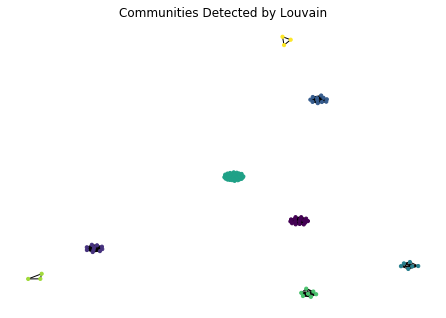

In [66]:
import community  # Import the python-louvain library

# Use the Louvain community detection algorithm to find communities in the graph
partition = community.best_partition(G)

# Create a dictionary where keys are user_ids, and values are the community labels
user_communities = {user_id: community_id for user_id, community_id in partition.items()}

# Add the community labels to your DataFrame
sub_merged['community'] = sub_merged['user_id'].map(user_communities)

# Now 'df' contains a new 'community' column indicating the community to which each user belongs.

# To visualize the communities, you can color the nodes based on their community
colors = [user_communities[user_id] for user_id in G.nodes()]

# Draw the graph with nodes colored by community
nx.draw(G, pos, with_labels=False, node_size=10, node_color=colors, cmap=plt.cm.viridis)
plt.title("Communities Detected by Louvain")
plt.show()


In [68]:
sub_merged.head(50)

,group_id,peer_name,about,user_id,post,community
100,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,465148562,CURRENT_MEMBER,3.0
101,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,122450098,CURRENT_MEMBER,3.0
102,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,207084440,CURRENT_MEMBER,3.0
103,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,136787747,CURRENT_MEMBER,3.0
104,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,255227508,FORMER_MEMBER,3.0
105,1000470102,ENGLISH TRAINING GROUP (RM),Our GROUP LINK https://t.me/joinchat/DeF5xj...,370065089,CURRENT_MEMBER,3.0
106,1000501147,اعلام بار ترانزیت پرشیا مهرو,بـسـْمِ اللّٰهِ الرّحْمٰن الرَّحــیْم ارتباط...,119591358,CURRENT_MEMBER,7.0
107,1000501147,اعلام بار ترانزیت پرشیا مهرو,بـسـْمِ اللّٰهِ الرّحْمٰن الرَّحــیْم ارتباط...,113355951,CURRENT_MEMBER,7.0
108,1000501147,اعلام بار ترانزیت پرشیا مهرو,بـسـْمِ اللّٰهِ الرّحْمٰن الرَّحــیْم ارتباط...,527953880,FORMER_MEMBER,7.0
109,1000507737,Tabriz,کانال شهر اولین ها معرفی رویداد ها ، جاذبه ها...,248541937,CHANNEL_MEMBER,NaN
